In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Stage 1

### Descriptive Statistics

In [ ]:
df =  pd.read_csv('/SBAnational_Split.csv')

pd.set_option('display.max_column', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
1,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,28-Feb-97,1997,137,2,1,0,0,1,0,N,Y,18-Apr-02,30-Jun-97,"$47,000.00",$0.00,CHGOFF,"$14,084.00","$47,000.00","$37,600.00"
2,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,11-Jun-80,1980,120,16,2,0,0,0,0,Y,N,4-Oct-89,31-Jul-80,"$197,485.00",$0.00,CHGOFF,"$44,374.00","$200,000.00","$150,000.00"
3,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,7-Feb-06,2006,167,9,1,0,9,1,1,0,N,26-Jun-14,28-Feb-06,"$1,350,000.00",$0.00,CHGOFF,"$1,043,508.00","$1,350,000.00","$1,012,500.00"
4,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,31-Mar-97,1997,7,10,1,0,0,1,0,0,N,4-Oct-05,28-Feb-98,"$25,000.00",$0.00,CHGOFF,"$23,484.00","$25,000.00","$12,500.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      258966 non-null  int64 
 1   Name               258955 non-null  object
 2   City               258962 non-null  object
 3   State              258965 non-null  object
 4   Zip                258966 non-null  int64 
 5   Bank               258791 non-null  object
 6   BankState          258790 non-null  object
 7   NAICS              258966 non-null  int64 
 8   ApprovalDate       258966 non-null  object
 9   ApprovalFY         258966 non-null  int64 
 10  Term               258966 non-null  int64 
 11  NoEmp              258966 non-null  int64 
 12  NewExist           258966 non-null  int64 
 13  CreateJob          258966 non-null  int64 
 14  RetainedJob        258966 non-null  int64 
 15  FranchiseCode      258966 non-null  int64 
 16  UrbanRural         2

In [ ]:
import re

def to_integer(string):
  string = re.sub('[^\d]', '', string)
  float_value = float(string)
  integer_value = int(float_value)
  return integer_value

In [ ]:
df['DisbursementGross'] = df['DisbursementGross'].apply(to_integer)
df['BalanceGross'] = df['BalanceGross'].apply(to_integer)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(to_integer)
df['GrAppv'] = df['GrAppv'].apply(to_integer)
df['SBA_Appv'] = df['SBA_Appv'].apply(to_integer)
df['CreateJob']= df['CreateJob'].astype(int)
df['RetainedJob']= df['RetainedJob'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      258966 non-null  int64 
 1   Name               258955 non-null  object
 2   City               258962 non-null  object
 3   State              258965 non-null  object
 4   Zip                258966 non-null  int64 
 5   Bank               258791 non-null  object
 6   BankState          258790 non-null  object
 7   NAICS              258966 non-null  int64 
 8   ApprovalDate       258966 non-null  object
 9   ApprovalFY         258966 non-null  int64 
 10  Term               258966 non-null  int64 
 11  NoEmp              258966 non-null  int64 
 12  NewExist           258966 non-null  int64 
 13  CreateJob          258966 non-null  int64 
 14  RetainedJob        258966 non-null  int64 
 15  FranchiseCode      258966 non-null  int64 
 16  UrbanRural         2

In [ ]:
num = {'Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'NewExist', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY'}
cat = {'City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'MIS_Status'}

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     11
City                      4
State                     1
Zip                       0
Bank                    175
BankState               176
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                36
LowDoc                  233
ChgOffDate           173173
DisbursementDate        487
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
UrbanRural,258966.00,0.80,0.63,0.00,0.00,1.00,1.00,2.00
Zip,258966.00,52365.55,31101.08,0.00,24439.50,52652.50,83440.00,99999.00
RetainedJob,258966.00,26.09,440.22,0.00,0.00,1.00,4.00,9500.00
GrAppv,258966.00,13771464.14,23428655.63,100000.00,2500000.00,5000000.00,13500000.00,400000000.00
BalanceGross,258966.00,324.61,162702.74,0.00,0.00,0.00,0.00,82787500.00
CreateJob,258966.00,23.70,439.76,0.00,0.00,0.00,1.00,8800.00
NAICS,258966.00,415848.88,251668.40,0.00,238210.00,448310.00,561730.00,928120.00
NewExist,258966.00,1.32,0.47,0.00,1.00,1.00,2.00,2.00
ApprovalFY,258966.00,2003.02,5.38,1966.00,1998.00,2006.00,2007.00,2008.00
Term,258966.00,93.10,69.51,0.00,55.00,84.00,87.00,480.00


In [ ]:
df[cat].describe().T

,count,unique,top,freq
LowDoc,258733,7,N,240509
MIS_Status,258966,2,P I F,175428
BankState,258790,52,NC,38140
City,258962,19832,LOS ANGELES,3871
State,258965,51,CA,37290
RevLineCr,258930,7,N,112141
Bank,258791,3667,BANK OF AMERICA NATL ASSOC,38711


### Univariate Analysis

In [ ]:
# fig, axes = plt.subplots(1, len(num), figsize=(25, 10))

# for i, feature in enumerate(num):
#     sns.boxplot(y=feature, data=df, ax=axes[i])
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Feature Values')
#     axes[i].set_title(feature)

# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 8))
# ax = sns.countplot(x='MIS_Status', data=df, palette='viridis')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.title('Bar Plot for Categorical Variable')
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# plt.show()

In [ ]:
# filtered_ChgOffPrinGr = [value for value in df['ChgOffPrinGr'] if value != 0]

# plt.figure(figsize=(10, 8))
# plt.hist(filtered_ChgOffPrinGr, bins=10, color='skyblue', edgecolor='black')

# plt.title('Charged-off Data Histogram (Excluding 0 values)')
# plt.xlabel('Charged-off')
# plt.ylabel('Frequency')

# for bar in plt.gca().patches:
#     plt.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# plt.ticklabel_format(style='plain', axis='x')
# plt.xticks(rotation=45)

# plt.show()

In [ ]:
# plt.figure(figsize=(16, 12))
# plt.subplots_adjust(hspace=0.5)

# for i, variable in enumerate(num):
#     plt.subplot(4, 4, i + 1)
#     sns.distplot(df[variable], bins=20, color='skyblue')
#     plt.xlabel(variable)
#     plt.ylabel('Density')
#     plt.title(f'Distplot of {variable}')

# plt.show()

### Multivariate Analysis


In [ ]:
df['MIS_Status_int'] = df['MIS_Status'].replace('P I F', 1).replace('CHGOFF', 0)

In [ ]:
num = {'Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'NewExist', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY','MIS_Status_int'}

In [ ]:
# num_corr = df[num].corr()

# plt.figure(figsize=(15,10))
# sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
# plt.xlabel('Variable')
# plt.ylabel('Variable')
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
# test = {'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'MIS_Status'}

# sns.pairplot(df[test], hue='MIS_Status')
# plt.show()

In [ ]:
# cat = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'MIS_Status']

# # Countplot untuk melihat korelasi antar fitur kategorikal
# plt.figure(figsize=(12, 8))
# for i in range(5):
#     plt.subplot(2, 3, i + 1)
#     sns.countplot(data=df, x=cat[i], hue='MIS_Status', palette='viridis')
#     plt.title(f'Countplot of {cat[i]}')
#     plt.xlabel(cat[i])
#     plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()

### Business Insight

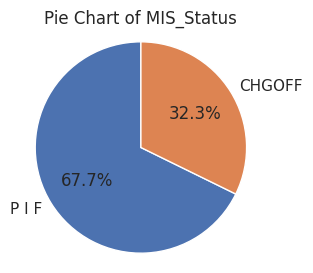

In [ ]:
# Hitung jumlah masing-masing nilai MIS_Status
mis_status_counts = df['MIS_Status'].value_counts()

# Buat pie chart dengan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(3, 3))
plt.pie(mis_status_counts, labels=mis_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of MIS_Status')
plt.axis('equal')
plt.show()

In [ ]:
df['Industry'] = df['NAICS'].astype(str).apply(lambda x: x[:2])
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

df['Industry'].fillna('Unknown', inplace=True)

In [ ]:
# # Total dan Rata-rata dana cair menurut industri

# industry_group = df.groupby(['Industry'])

# # Data frames based on groupby by Industry looking at aggregate and average values
# df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
# df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# # Establish figure for placing bar charts side-by-side
# fig = plt.figure(figsize=(25, 5))

# # Add subplots to figure to build 1x2 grid and specify position of each subplot
# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2)

# # Bar chart 1 = Gross SBA Loan Disbursement by Industry
# ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
# ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

# ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
# ax1.set_xlabel('Industry')
# ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# # Bar chart 2 = Average SBA Loan Disbursement by Industry
# ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
# ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

# ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
# ax2.set_xlabel('Industry')
# ax2.set_ylabel('Average Loan Disbursement')

# plt.show()

In [ ]:
# # PIF dan CHGOFF by Industry

# fig, ax = plt.subplots(figsize=(15, 10))

# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     ax.bar(data.index, data[1], label='Paid in full')
#     ax.bar(data.index, data[0], bottom=data[1], label='CHGOFF')


# stacked(df=df, col='Industry', ax=ax)
# ax.set_xticklabels(df.groupby(['Industry', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int').index,
#                    rotation=35, horizontalalignment='right', fontsize=10)

# ax.set_title('Jumlah PIF/CHGOFF by Industry from 1984-2010', fontsize=15)
# ax.set_xlabel('Industry')
# ax.set_ylabel('Jumlah PIF/CHGOFF')
# ax.legend()
# plt.show()

In [ ]:
# Cek Persentase CHGOFF untuk tiap Industri

df_ind = df.groupby(['Industry', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int')
df_ind['Persentase'] = df_ind[0] / (df_ind[0] + df_ind[1])
df_ind['Persentase'].sort_values(ascending=False)

Industry
RE/Rental/Lease            0.48
Finance/Insurance          0.47
Trans/Ware                 0.43
Construction               0.39
Information                0.39
Admin_sup/Waste_Mgmt_Rem   0.39
Retail_trade               0.38
Educational                0.38
Accom/Food_serv            0.37
Wholesale_trade            0.37
Arts/Entertain/Rec         0.35
Other_no_pub               0.34
Prof/Science/Tech          0.33
Manufacturing              0.30
Utilities                  0.28
Public_Admin               0.22
Mgmt_comp                  0.21
Healthcare/Social_assist   0.20
Unknown                    0.17
Ag/For/Fish/Hunt           0.16
Min/Quar/Oil_Gas_ext       0.14
Name: Persentase, dtype: float64

In [ ]:
# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     # Menghitung persentase CHGOFF
#     data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

#     # Mengambil 10 data dengan persentase CHGOFF terbesar
#     top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=False).head(10)

#     # Plot bar PIF
#     ax.bar(top_10.index, top_10[1], label='PIF')

#     # Plot bar CHGOFF di atas PIF
#     ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

#     # Tambahkan label persentase CHGOFF di atas batang CHGOFF dan PIF
#     for index, row in top_10.iterrows():
#         chgoff_percentage = row['CHGOFF_Percentage']
#         ax.text(index, row[0] + row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

#     # Mengatur label pada sumbu x
#     ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# # Membuat figure dan axis
# fig, ax = plt.subplots(figsize=(15, 10))

# # Memanggil fungsi stacked
# stacked(df=df, col='Industry', ax=ax)

# # Menambahkan judul dan label pada grafik
# ax.set_title('10 CHGOFF Terbesar Berdasarkan Industry dari 1984-2010', fontsize=15)
# ax.set_xlabel('Industry')
# ax.set_ylabel('Jumlah PIF/CHGOFF')

# # Menampilkan legenda
# ax.legend()

# # Menampilkan grafik
# plt.show()


In [ ]:
# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     # Menghitung persentase CHGOFF
#     data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

#     # Mengambil 10 data dengan persentase CHGOFF terkecil
#     top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=True).head(10)

#     # Plot bar PIF
#     ax.bar(top_10.index, top_10[1], label='PIF')

#     # Plot bar CHGOFF di atas PIF
#     ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

#     # Tambahkan label persentase CHGOFF di atas batang CHGOFF dan PIF
#     for index, row in top_10.iterrows():
#         chgoff_percentage = row['CHGOFF_Percentage']
#         ax.text(index, row[0] + row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

#     # Mengatur label pada sumbu x
#     ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# # Membuat figure dan axis
# fig, ax = plt.subplots(figsize=(15, 10))

# # Memanggil fungsi stacked
# stacked(df=df, col='Industry', ax=ax)

# # Menambahkan judul dan label pada grafik
# ax.set_title('10 CHGOFF Terkecil Berdasarkan Industry dari 1984-2010', fontsize=15)
# ax.set_xlabel('Industry')
# ax.set_ylabel('Jumlah PIF/CHGOFF')

# # Menampilkan legenda
# ax.legend()

# # Menampilkan grafik
# plt.show()

In [ ]:
# # PIF dan CHGOFF by State

# fig, ax = plt.subplots(figsize=(15, 10))

# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     ax.bar(data.index, data[1], label='Paid in full')
#     ax.bar(data.index, data[0], bottom=data[1], label='CHGOFF')


# stacked(df=df, col='State', ax=ax)
# ax.set_xticklabels(df.groupby(['State', 'MIS_Status_int'])['State'].count().unstack('MIS_Status_int').index,
#                    rotation=35, horizontalalignment='right', fontsize=10)

# ax.set_title('Jumlah PIF/CHGOFF by State from 1984-2010', fontsize=15)
# ax.set_xlabel('Industry')
# ax.set_ylabel('Jumlah PIF/CHGOFF')
# ax.legend()
# plt.show()

In [ ]:
# Cek Persentase CHGOFF untuk tiap State

df_State = df.groupby(['State', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int')
df_State['Persentase'] = df_State[0] / (df_State[0] + df_State[1])
df_State['Persentase'].sort_values(ascending=False)

State
FL   0.46
GA   0.43
NV   0.42
TN   0.39
AZ   0.39
IL   0.39
MI   0.38
AK   0.37
CA   0.37
NJ   0.35
SC   0.35
DC   0.35
AL   0.34
LA   0.33
NY   0.33
CO   0.33
NC   0.33
VA   0.32
TX   0.32
MD   0.32
WA   0.29
AR   0.29
IN   0.29
OR   0.29
DE   0.29
MS   0.29
UT   0.28
KY   0.28
MO   0.28
ID   0.28
KS   0.27
OK   0.27
OH   0.26
HI   0.26
PA   0.25
CT   0.25
WV   0.25
NM   0.24
MA   0.24
IA   0.23
RI   0.22
WI   0.21
NE   0.21
NH   0.21
MN   0.20
SD   0.19
ME   0.17
MT   0.15
ND   0.15
WY   0.14
VT   0.14
Name: Persentase, dtype: float64

In [ ]:
# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     # Menghitung persentase CHGOFF
#     data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

#     # Mengambil 10 data dengan persentase CHGOFF terbesar
#     top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=False).head(10)

#     # Plot bar PIF
#     ax.bar(top_10.index, top_10[1], label='PIF')

#     # Plot bar CHGOFF di atas PIF
#     ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

#     # Tambahkan label persentase CHGOFF
#     for index, row in top_10.iterrows():
#         chgoff_percentage = row['CHGOFF_Percentage']
#         ax.text(index, row[0]+row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

#     # Mengatur label pada sumbu x
#     ax.set_xticklabels(top_10.index, rotation=0, horizontalalignment='right', fontsize=10)

# # Membuat figure dan axis
# fig, ax = plt.subplots(figsize=(15, 10))

# # Memanggil fungsi stacked
# stacked(df=df, col='State', ax=ax)

# # Menambahkan judul dan label pada grafik
# ax.set_title('10 ChgOff Terbesar Berdasarkan State Dari 1984-2010', fontsize=15)
# ax.set_xlabel('State')
# ax.set_ylabel('Jumlah PIF/CHGOFF')

# # Menampilkan legenda
# ax.legend()

# # Menampilkan grafik
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Membuat fungsi stacked bar
# def stacked(df, col, ax, stack_col='MIS_Status_int'):
#     data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
#     data.fillna(0)

#     # Menghitung persentase CHGOFF
#     data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

#     # Mengambil 10 data dengan persentase CHGOFF terkecil
#     top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=True).head(10)

#     # Plot bar PIF
#     ax.bar(top_10.index, top_10[1], label='PIF')

#     # Plot bar CHGOFF di atas PIF
#     ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

#     # Tambahkan label persentase CHGOFF
#     for index, row in top_10.iterrows():
#         chgoff_percentage = row['CHGOFF_Percentage']
#         ax.text(index, row[0]+row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

#     # Mengatur label pada sumbu x
#     ax.set_xticklabels(top_10.index, rotation=0, horizontalalignment='right', fontsize=10)

# # Membuat figure dan axis
# fig, ax = plt.subplots(figsize=(15, 10))

# # Memanggil fungsi stacked
# stacked(df=df, col='State', ax=ax)

# # Menambahkan judul dan label pada grafik
# ax.set_title('10 ChgOff Terkecil Berdasarkan State Dari 1984-2010', fontsize=15)
# ax.set_xlabel('State')
# ax.set_ylabel('Jumlah PIF/CHGOFF')

# # Menampilkan legenda
# ax.legend()

# # Menampilkan grafik
# plt.show()

## Stage 2

### Data Cleansing

#### Handle Misiing Values

In [ ]:
#Cek nilai missing value

df.isnull().sum()

LoanNr_ChkDgt             0
Name                     11
City                      4
State                     1
Zip                       0
Bank                    175
BankState               176
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                36
LowDoc                  233
ChgOffDate           173173
DisbursementDate        487
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
MIS_Status_int            0
Industry                  0
dtype: int64

In [ ]:
# menggali info tipe data apa saja yang memiliki nilai missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      258966 non-null  int64 
 1   Name               258955 non-null  object
 2   City               258962 non-null  object
 3   State              258965 non-null  object
 4   Zip                258966 non-null  int64 
 5   Bank               258791 non-null  object
 6   BankState          258790 non-null  object
 7   NAICS              258966 non-null  int64 
 8   ApprovalDate       258966 non-null  object
 9   ApprovalFY         258966 non-null  int64 
 10  Term               258966 non-null  int64 
 11  NoEmp              258966 non-null  int64 
 12  NewExist           258966 non-null  int64 
 13  CreateJob          258966 non-null  int64 
 14  RetainedJob        258966 non-null  int64 
 15  FranchiseCode      258966 non-null  int64 
 16  UrbanRural         2

In [ ]:
# menghapus feature atau mengisi nilai missing value
df = df.drop(columns=["ChgOffDate"])

df["Name"].fillna("", inplace=True)
df["City"].fillna(df["City"].mode()[0], inplace=True)
df["State"].fillna(df["State"].mode()[0], inplace=True)
df["Bank"].fillna(df["Bank"].mode()[0], inplace=True)
df["BankState"].fillna(df["BankState"].mode()[0], inplace=True)
df["RevLineCr"].fillna(df["RevLineCr"].mode()[0], inplace=True)
df["LowDoc"].fillna(df["LowDoc"].mode()[0], inplace=True)
df["DisbursementDate"].fillna(df["DisbursementDate"].mode()[0], inplace=True)

df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
MIS_Status_int       0
Industry             0
dtype: int64

#### Handle Duplicated Data

In [ ]:
# mengecek duplicate
df.duplicated().sum()

0

#### Handle Outliers

In [ ]:
# handiling outliers
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True]*len(df))
for col in ['Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
            'UrbanRural', 'NewExist', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr',
            'GrAppv', 'SBA_Appv', 'ApprovalFY']:
  z_scores = abs(stats.zscore(df[col]))
  filtered_entries = (z_scores < 2)

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 258966
Jumlah baris setelah memfilter outlier: 248928


In [ ]:
# # mengecek persebaran data menggunakan boxplot
# fig, axes = plt.subplots(1, len(num), figsize=(25, 10))

# for i, feature in enumerate(num):
#     sns.boxplot(y=feature, data=df, ax=axes[i])
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Feature Values')
#     axes[i].set_title(feature)

# plt.tight_layout()
# plt.show()

#### Feature Transformation

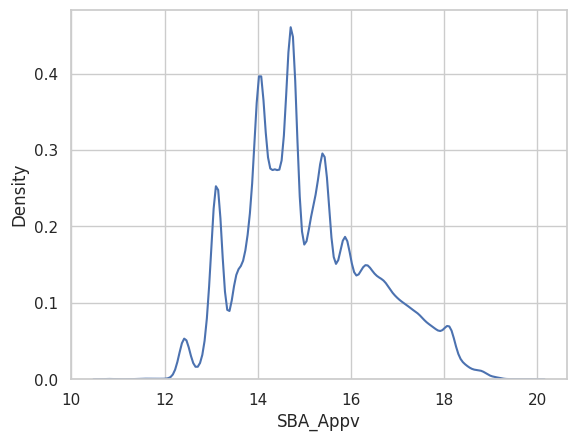

In [ ]:
# feature transformation menggunakan log
sns.kdeplot(np.log(df['SBA_Appv']))
df['log_SBA_Appv'] = np.log(df['SBA_Appv'])

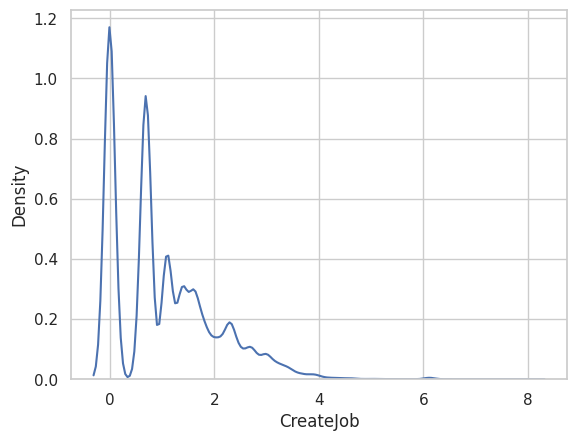

In [ ]:
sns.kdeplot(np.log(df['CreateJob']))
df['log_CreateJob'] = np.log(df['CreateJob'])

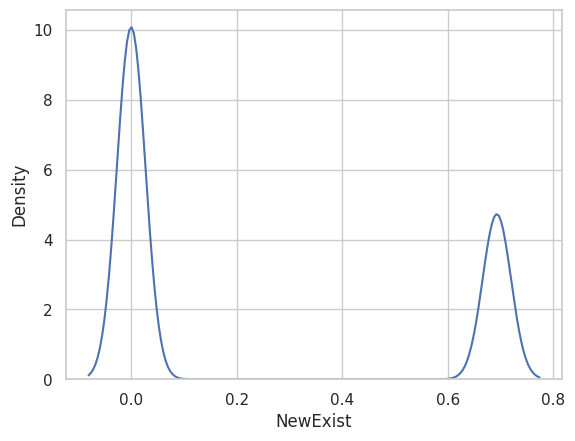

In [ ]:
sns.kdeplot(np.log(df['NewExist']))
df['log_NewExist'] = np.log(df['NewExist'])

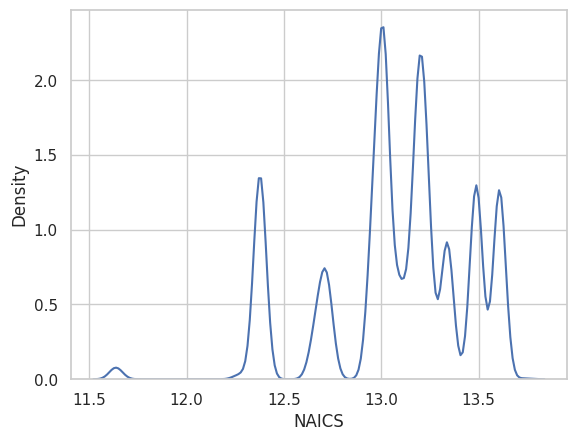

In [ ]:
sns.kdeplot(np.log(df['NAICS']))
df['log_NAICS'] = np.log(df['NAICS'])

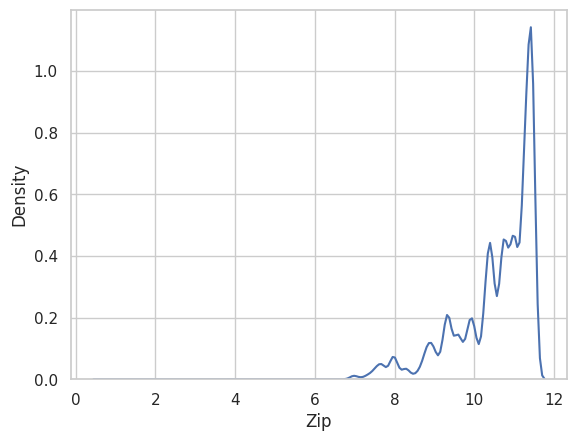

In [ ]:
sns.kdeplot(np.log(df['Zip']))
df['log_Zip'] = np.log(df['Zip'])

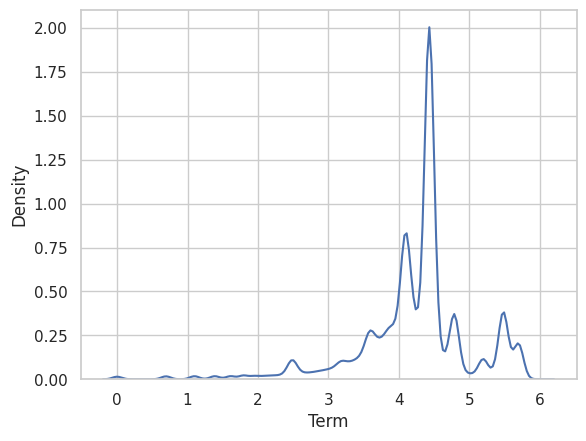

In [ ]:
sns.kdeplot(np.log(df['Term']))
df['log_Term'] = np.log(df['Term'])

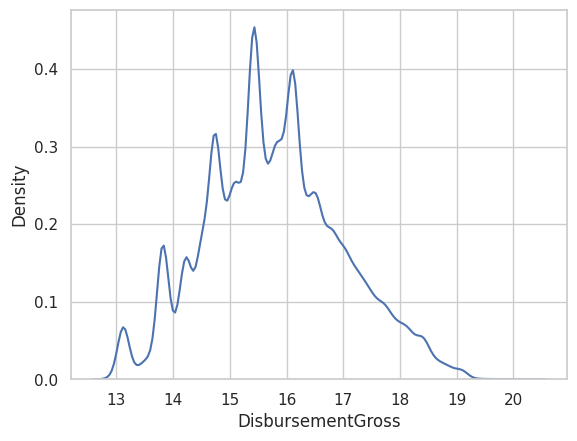

In [ ]:
sns.kdeplot(np.log(df['DisbursementGross']))
df['log_DisbursementGross'] = np.log(df['DisbursementGross'])

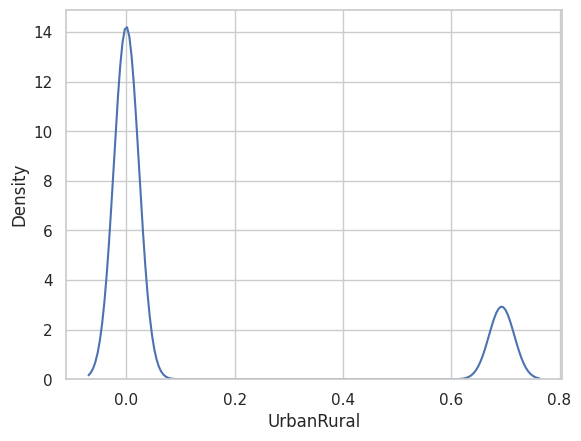

In [ ]:
sns.kdeplot(np.log(df['UrbanRural']))
df['log_UrbanRural'] = np.log(df['UrbanRural'])

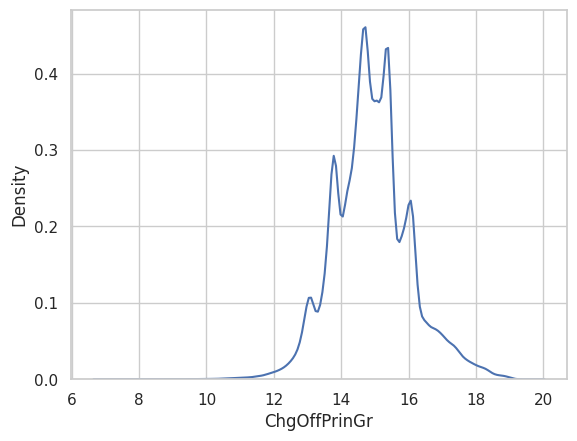

In [ ]:
sns.kdeplot(np.log(df['ChgOffPrinGr']))
df['log_ChgOffPrinGr'] = np.log(df['ChgOffPrinGr'])

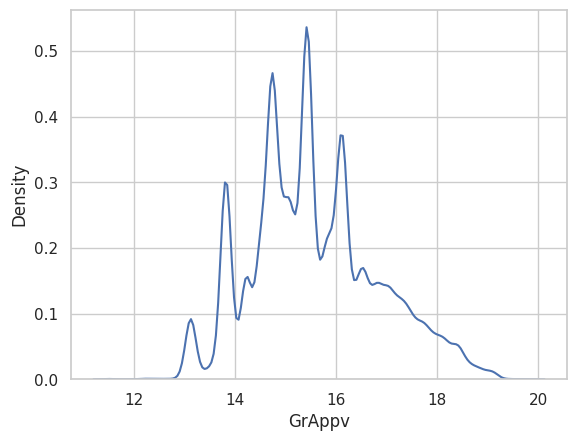

In [ ]:
sns.kdeplot(np.log(df['GrAppv']))
df['log_GrAppv'] = np.log(df['GrAppv'])

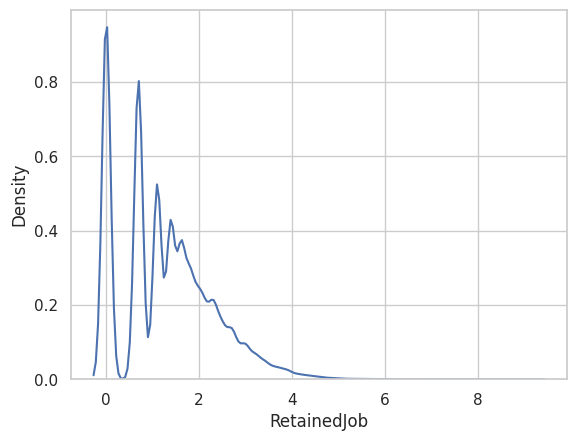

In [ ]:
sns.kdeplot(np.log(df['RetainedJob']))
df['log_RetainedJob'] = np.log(df['RetainedJob'])

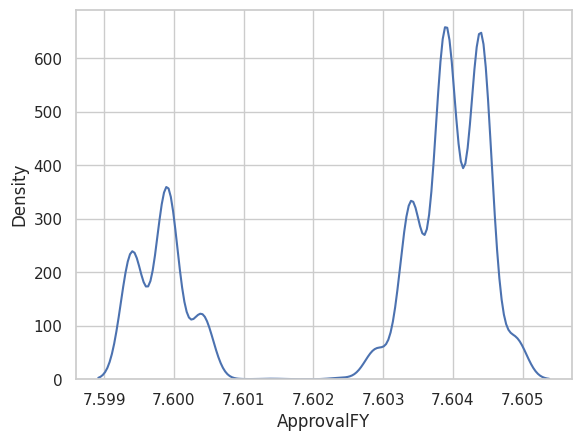

In [ ]:
sns.kdeplot(np.log(df['ApprovalFY']))
df['log_ApprovalFY'] = np.log(df['ApprovalFY'])

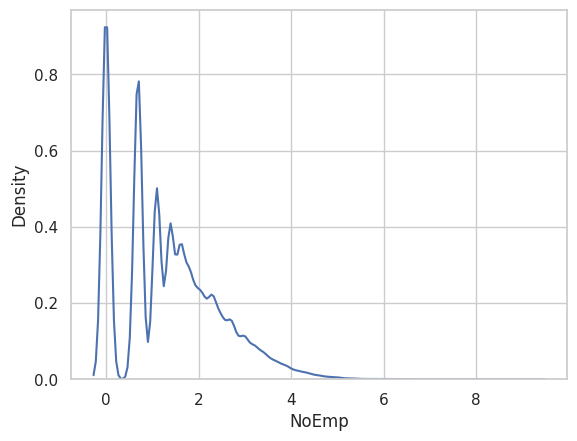

In [ ]:
sns.kdeplot(np.log(df['NoEmp']))
df['log_NoEmp'] = np.log(df['NoEmp'])

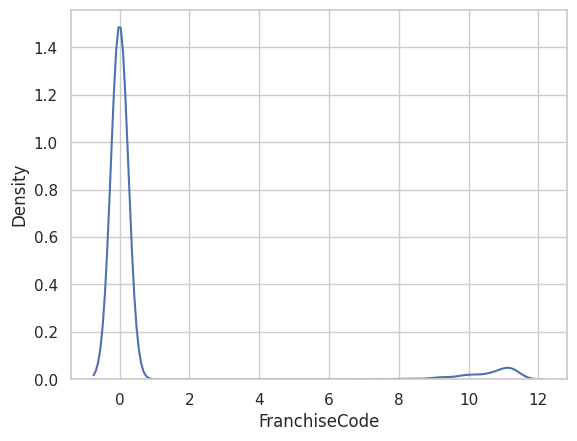

In [ ]:
sns.kdeplot(np.log(df['FranchiseCode']))
df['log_FranchiseCode'] = np.log(df['FranchiseCode'])

#### Feature Encoding

In [ ]:
# feature encoding terhadap feature kategorikal
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Cat_City'] = label_encoder.fit_transform(df['City'])
df['Cat_State'] = label_encoder.fit_transform(df['State'])
df['Cat_Bank'] = label_encoder.fit_transform(df['Bank'])
df['Cat_BankState'] = label_encoder.fit_transform(df['BankState'])
df['Cat_Industry'] = label_encoder.fit_transform(df['Industry'])

#menampilkan dataframe
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_int,Industry,log_SBA_Appv,log_CreateJob,log_NewExist,log_NAICS,log_Zip,log_Term,log_DisbursementGross,log_UrbanRural,log_ChgOffPrinGr,log_GrAppv,log_RetainedJob,log_ApprovalFY,log_NoEmp,log_FranchiseCode,Cat_City,Cat_State,Cat_Bank,Cat_BankState,Cat_Industry
1,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,28-Feb-97,1997,137,2,1,0,0,1,0,N,Y,30-Jun-97,4700000,0,CHGOFF,1408400,4700000,3760000,0,Unknown,15.14,-inf,0.00,-inf,10.70,4.92,15.36,-inf,14.16,15.36,-inf,7.60,0.69,0.00,8507,35,894,35,18
3,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,7-Feb-06,2006,167,9,1,0,9,1,1,0,N,28-Feb-06,135000000,0,CHGOFF,104350800,135000000,101250000,0,Construction,18.43,-inf,0.00,12.37,8.50,5.12,18.72,0.00,18.46,18.72,2.20,7.60,2.20,0.00,2862,21,3158,42,4
4,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,31-Mar-97,1997,7,10,1,0,0,1,0,0,N,28-Feb-98,2500000,0,CHGOFF,2348400,2500000,1250000,0,Arts/Entertain/Rec,14.04,-inf,0.00,13.48,10.81,1.95,14.73,-inf,14.67,14.73,-inf,7.60,2.30,0.00,16744,22,3158,42,3
5,1000755009,Grass Valley Market,Grass Valley,OR,0,WELLS FARGO BANK NATL ASSOC,SD,0,31-Mar-97,1997,37,7,1,0,0,1,0,0,N,28-Feb-98,2000000,0,CHGOFF,1965300,2000000,1000000,0,Unknown,13.82,-inf,0.00,-inf,-inf,3.61,14.51,-inf,14.49,14.51,-inf,7.60,1.95,0.00,6729,37,3158,42,18
6,1000766008,LILY DAY GARDENS,BURNET,TX,78611,WELLS FARGO BANK NATL ASSOC,SD,444220,7-Feb-06,2006,26,4,2,1,5,1,2,Y,N,28-Feb-06,6085900,0,CHGOFF,1999400,2000000,1000000,0,Retail_trade,13.82,0.00,0.69,13.00,11.27,3.26,15.62,0.69,14.51,14.51,1.61,7.60,1.39,0.00,1698,43,3158,42,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258961,2761235005,Top Notch Enterprizes Corp,EWA BEACH,HI,96706,BBCN BANK,CA,448190,16-Oct-07,2008,22,2,2,3,2,0,1,N,N,31-Oct-07,1000000,0,P I F,423300,1000000,850000,1,Retail_trade,13.65,1.10,0.69,13.01,11.48,3.09,13.82,0.00,12.96,13.82,0.69,7.60,0.69,-inf,5063,11,423,4,16
258962,2761246004,MOHAMMAD FARIDI,ATLANTA,GA,30354,GEORGIA CERT. DEVEL CORP,GA,447110,18-Apr-07,2007,240,3,1,2,0,1,1,0,N,12-Sep-07,31800000,0,P I F,0,41100000,41100000,1,Retail_trade,17.53,0.69,0.00,13.01,10.32,5.48,17.27,0.00,-inf,17.53,-inf,7.60,1.10,0.00,452,10,1493,10,16
258963,2761256007,FOUR SEASONS LANDSCAPING & NUR,PLATTEVILLE,WI,53818,DUPACO COMMUNITY CU,IA,561730,18-Apr-07,2007,240,5,1,1,4,1,2,0,N,31-Jul-07,50000000,0,P I F,0,50000000,37500000,1,Admin_sup/Waste_Mgmt_Rem,17.44,0.00,0.00,13.24,10.89,5.48,17.73,0.69,-inf,17.73,1.39,7.60,1.61,0.00,13311,48,968,12,1
258964,2761265003,Hillside Maintenance Supply Co,Cincinnati,OH,45206,"PNC BANK, NATIONAL ASSOCIATION",DE,454390,16-Oct-07,2008,98,20,1,0,20,0,1,T,N,29-Feb-08,58626200,0,P I F,0,27500000,13750000,1,Retail_trade,16.44,-inf,0.00,13.03,10.72,4.58,17.89,0.00,-inf,17.13,3.00,7.60,3.00,-inf,3612,35,2336,8,16


In [ ]:
# # Melihat korelasi semua feature terhadap feature target (MIS_Status_int)
# num = {'Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'NewExist', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY',
#        'Cat_City', 'Cat_Bank', 'Cat_State', 'Cat_BankState', 'log_SBA_Appv', 'log_SBA_Appv', 'log_CreateJob', 'log_NewExist', 'log_NAICS', 'log_Zip',
#        'log_Term', 'log_DisbursementGross', 'log_UrbanRural', 'log_ChgOffPrinGr', 'log_GrAppv', 'log_RetainedJob', 'log_ApprovalFY', 'log_NoEmp', 'log_FranchiseCode', 'MIS_Status_int'}
# num_corr = df[num].corr()

# plt.figure(figsize=(25,15))
# sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.2f')
# plt.xlabel('Variable')
# plt.ylabel('Variable')
# plt.title('Correlation Heatmap')
# plt.show()

### Feature Engineering

In [ ]:
# cek informasi dari keseluruhan feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248928 entries, 1 to 258965
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNr_ChkDgt          248928 non-null  int64  
 1   Name                   248928 non-null  object 
 2   City                   248928 non-null  object 
 3   State                  248928 non-null  object 
 4   Zip                    248928 non-null  int64  
 5   Bank                   248928 non-null  object 
 6   BankState              248928 non-null  object 
 7   NAICS                  248928 non-null  int64  
 8   ApprovalDate           248928 non-null  object 
 9   ApprovalFY             248928 non-null  int64  
 10  Term                   248928 non-null  int64  
 11  NoEmp                  248928 non-null  int64  
 12  NewExist               248928 non-null  int64  
 13  CreateJob              248928 non-null  int64  
 14  RetainedJob            248928 non-nu

#### Feature Extraction

In [ ]:
# membuat feature baru, feature RiskScore
def calculate_risk_score(df):
    risk_score = ((df['Term'] * df['NoEmp'] * df['FranchiseCode'] * df['UrbanRural'] * df['NewExist']) + df['GrAppv'] + df['SBA_Appv']) / 5
    return risk_score
df['RiskScore'] = calculate_risk_score(df)

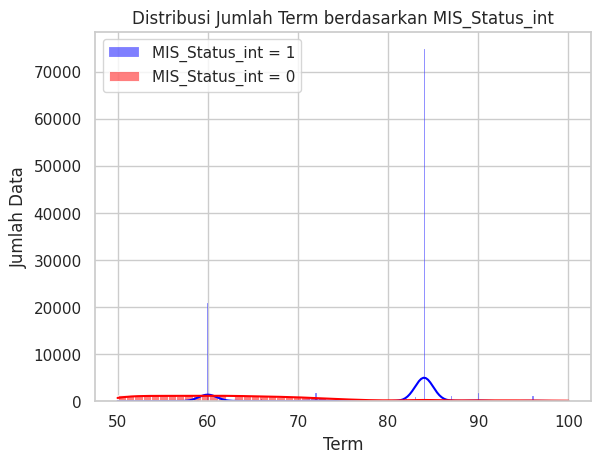

In [ ]:
# membuat feature baru, feature term_category_encoded
check = df[(df['Term'] >= 50) & (df['Term'] <= 100)]

mis_status_1 = check[df['MIS_Status_int'] == 1]['Term']
mis_status_0 = check[df['MIS_Status_int'] == 0]['Term']

sns.histplot(mis_status_1, kde=True, label='MIS_Status_int = 1', color='blue')
sns.histplot(mis_status_0, kde=True, label='MIS_Status_int = 0', color='red')

plt.xlabel('Term')
plt.ylabel('Jumlah Data')
plt.legend()
plt.title('Distribusi Jumlah Term berdasarkan MIS_Status_int')

plt.show()

In [ ]:
def category(Term):
    if Term < 58:
        return "low"
    elif Term < 62:
        return "medium"
    elif Term < 82:
        return "high"
    else:
        return "very high"

df["term_category"] = df["Term"].apply(category)
df["term_category_encoded"] = df["term_category"].replace({
    "low": 0,
    "medium": 1,
    "high": 2,
    "very high": 3
})
df = df.drop(columns=["term_category"])

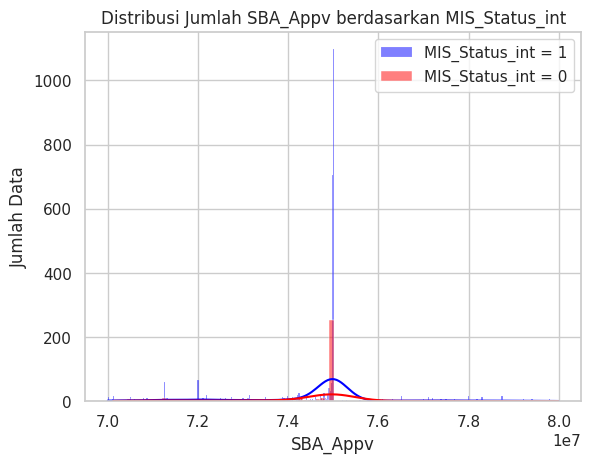

In [ ]:
# membuat feature baru, feature SBA_Appv_category_encoded
check = df[(df['SBA_Appv'] >= 70000000) & (df['SBA_Appv'] <= 80000000)]

mis_status_1 = check[df['MIS_Status_int'] == 1]['SBA_Appv']
mis_status_0 = check[df['MIS_Status_int'] == 0]['SBA_Appv']

sns.histplot(mis_status_1, kde=True, label='MIS_Status_int = 1', color='blue')
sns.histplot(mis_status_0, kde=True, label='MIS_Status_int = 0', color='red')

plt.xlabel('SBA_Appv')
plt.ylabel('Jumlah Data')
plt.legend()
plt.title('Distribusi Jumlah SBA_Appv berdasarkan MIS_Status_int')

plt.show()

In [ ]:
def category(SBA_Appv):
    if SBA_Appv < 74000000:
        return "low"
    elif SBA_Appv < 76000000:
        return "medium"
    else:
        return "very high"

df["SBA_Appv_category"] = df["SBA_Appv"].apply(category)
df["SBA_Appv_category_encoded"] = df["SBA_Appv_category"].replace({
    "low": 0,
    "medium": 1,
    "high": 2,
})
df = df.drop(columns=["SBA_Appv_category"])

In [ ]:
# membuat feature baru, feature SBA_Approval_Percentage
df['SBA_Approval_Percentage'] = (df['SBA_Appv'] / df['GrAppv']) * 100

In [ ]:
# membuat feature baru, feature Job_Stability
df['Job_Stability'] = df.apply(lambda row: 1 if row['RetainedJob'] > row['CreateJob'] else 0, axis=1)

In [ ]:
# membuat feature baru, feature Company_Size
df['CompanySize'] = df['NoEmp'].apply(lambda x: 0 if x < 25 else (1 if x < 100 else 2))
df.drop(columns=['NoEmp'], inplace=True)

In [ ]:
# membuat feature baru, feature Franchise_Code
df['Franchise'] = df['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)
df.drop(columns=['FranchiseCode'], inplace=True)

In [ ]:
# membuat feature baru, feature Recession

# Ubah kolom "DisbursementDate" menjadi tipe data datetime
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df['Recession'] = df['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)

In [ ]:
# Buat kolom baru "State_Category" dengan nilai 1 untuk negara bagian yang tidak masuk dalam daftar dan 0 untuk yang masuk dalam daftar
df['State_Category'] = df['State'].apply(lambda x: 0 if x in ['FL', 'GA', 'NV', 'TN', 'AZ', 'IL', 'MI', 'AK', 'CA', 'NJ', 'SC',
                                                               'DC', 'AL', 'LA', 'NY', 'CO', 'NC', 'VA', 'TX','MD'] else 1)

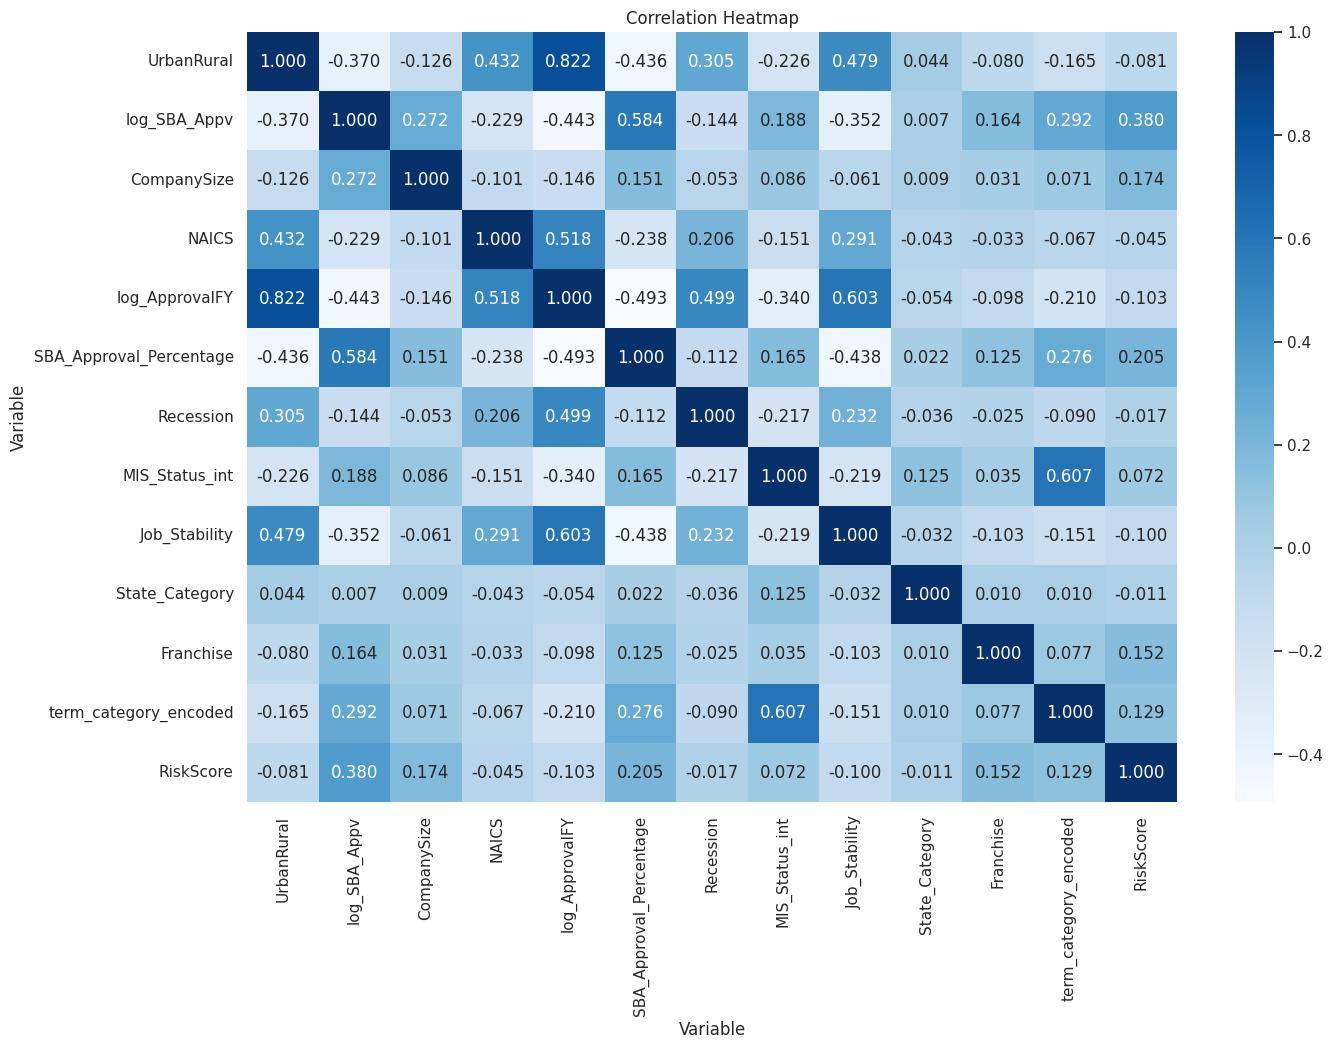

In [ ]:
# cek korelasi
num = {'State_Category', 'log_ApprovalFY', 'log_SBA_Appv', 'UrbanRural',
       'NAICS', 'RiskScore', 'SBA_Appv_category_encoded', 'SBA_Approval_Percentage',
       'Job_Stability', 'CompanySize', 'Franchise',
       'term_category_encoded', 'Recession', 'MIS_Status_int'}
num_corr = df[num].corr()

plt.figure(figsize=(15,10))
sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

#### Feature Selection

In [ ]:
# feature scalling dengan StandarScaler
from sklearn.preprocessing import StandardScaler

df['log_SBA_Appv_std'] = StandardScaler().fit_transform(df['log_SBA_Appv'].values.reshape(len(df), 1))
df['log_ApprovalFY_std'] = StandardScaler().fit_transform(df['log_ApprovalFY'].values.reshape(len(df), 1))
df['term_category_encoded_std'] = StandardScaler().fit_transform(df['term_category_encoded'].values.reshape(len(df), 1))
df['UrbanRural_std'] = StandardScaler().fit_transform(df['UrbanRural'].values.reshape(len(df), 1))
df['Job_Stability_std'] = StandardScaler().fit_transform(df['Job_Stability'].values.reshape(len(df), 1))
df['Recession_std'] = StandardScaler().fit_transform(df['Recession'].values.reshape(len(df), 1))
df['NAICS_std'] = StandardScaler().fit_transform(df['NAICS'].values.reshape(len(df), 1))
df['State_Category_std'] = StandardScaler().fit_transform(df['State_Category'].values.reshape(len(df), 1))

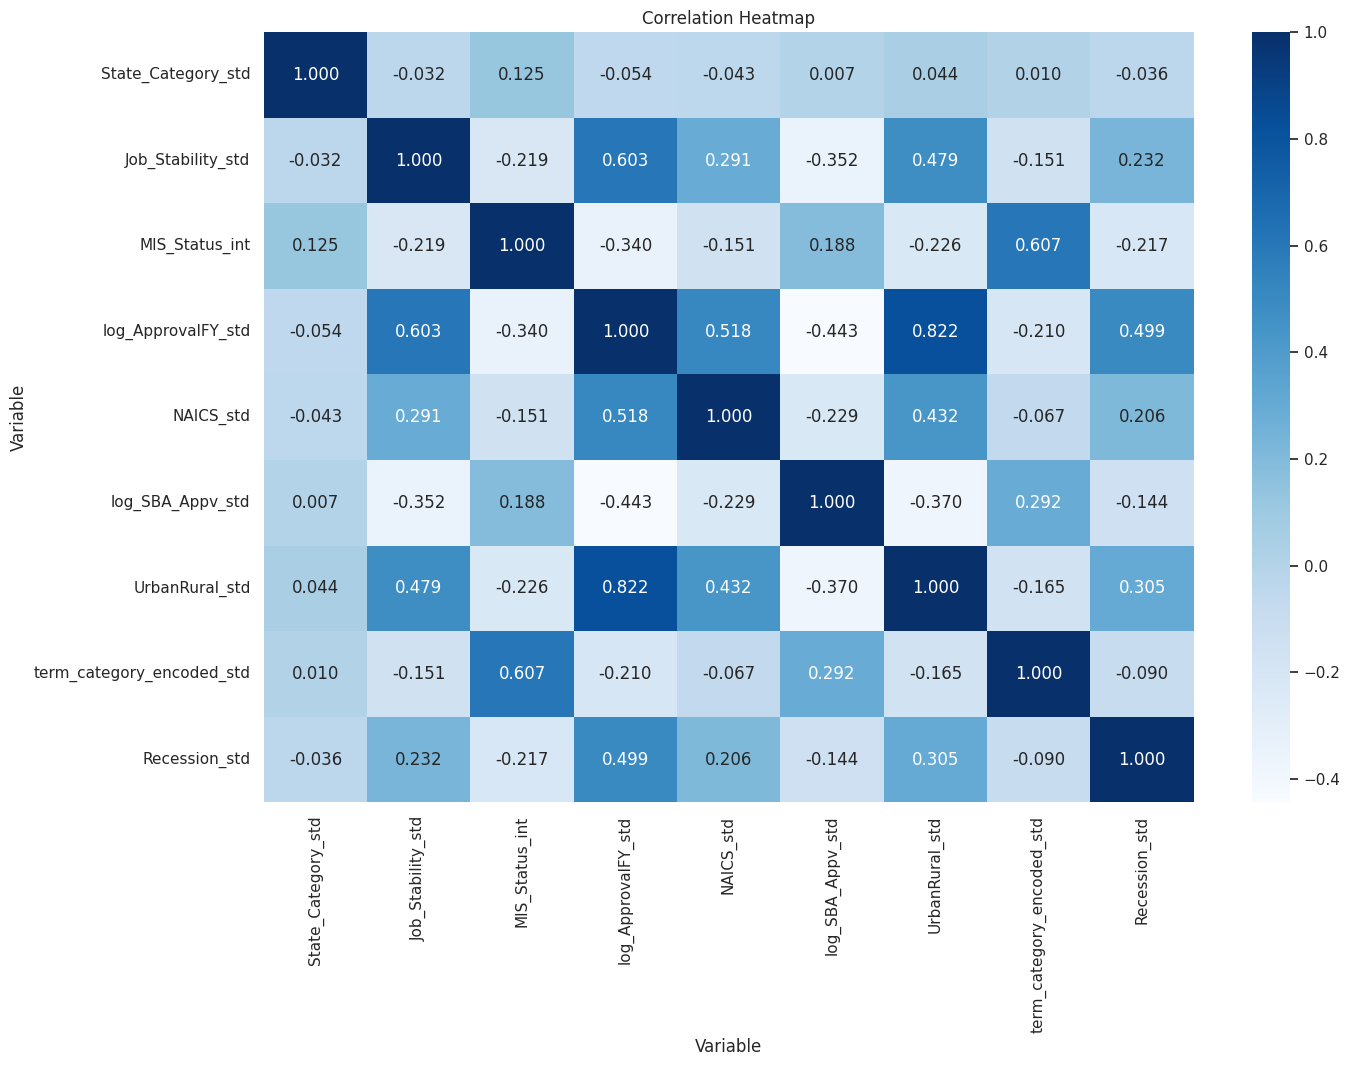

In [ ]:
# mengecek korelasi dengan feature target
num = {'NAICS_std', 'State_Category_std', 'log_SBA_Appv_std', 'log_ApprovalFY_std',
       'term_category_encoded_std', 'UrbanRural_std', 'Job_Stability_std',
       'Recession_std', 'MIS_Status_int'}
num_corr = df[num].corr()

plt.figure(figsize=(15,10))
sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# memasukkan ke variable df untuk feature-feature yang sudah dipilih
df = df[['State_Category_std', 'NAICS_std', 'log_SBA_Appv_std',
         'log_ApprovalFY_std', 'term_category_encoded_std', 'UrbanRural_std',
         'Job_Stability_std', 'Recession_std', 'MIS_Status_int']]

#### Handle Class Imbalance

In [ ]:
# melihat jumlah data yang bernilai 1 dan 0 di feature target MIS_Status_int
print(df['MIS_Status_int'].value_counts())

1    170190
0     78738
Name: MIS_Status_int, dtype: int64


In [ ]:
# memisahkan feature target
X = df.drop(columns=['MIS_Status_int'])
y = df['MIS_Status_int']

In [ ]:
# melakukan split data training dan data testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menggunakan oversampling data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

0    136036
1    136036
Name: MIS_Status_int, dtype: int64


## Stage 3

### Modeling

#### Data Train & Test

In [ ]:
print("Total data dalam X_train:", X_train.shape[0])
print("Total data dalam X_test:", X_test.shape[0])
print("Total data dalam y_train:", y_train.shape[0])
print("Total data dalam y_test:", y_test.shape[0])
print("Total data dalam X_resampled:", X_resampled.shape[0])
print("Total data dalam y_resampled:", y_resampled.shape[0])

Total data dalam X_train: 199142
Total data dalam X_test: 49786
Total data dalam y_train: 199142
Total data dalam y_test: 49786
Total data dalam X_resampled: 272072
Total data dalam y_resampled: 272072


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_resampled, y_resampled) # fit model regression dari data train

LogisticRegression()

In [ ]:
y_predicted = logreg.predict(X_test) # prediksi data test
y_pred = logreg.predict(X_resampled)
from sklearn.metrics import accuracy_score, precision_score
train_precision_logreg = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_logreg = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_logreg = round(precision_score(y_test, y_predicted), 2)
test_accuracy_logreg = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_logreg)
print(f'Train Accuracy: ', train_accuracy_logreg)
print(f'Test Precision: ', test_precision_logreg)
print(f'Test Accuracy: ', test_accuracy_logreg)

Train Precision:  0.82
Train Accuracy:  0.83
Test Precision:  0.91
Test Accuracy:  0.83


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Model: LogisticRegression(C=100)


In [ ]:
best_logreg = LogisticRegression(C=100, penalty='l2')  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_logreg.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_logreg.predict(X_test)
y_pred = best_logreg.predict(X_resampled)

from sklearn.metrics import accuracy_score, precision_score
train_precision_bestlogreg = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestlogreg = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestlogreg = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestlogreg = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestlogreg)
print(f'Train Accuracy: ', train_accuracy_bestlogreg)
print(f'Test Precision: ', test_precision_bestlogreg)
print(f'Test Accuracy: ', test_accuracy_bestlogreg)

Train Precision:  0.82
Train Accuracy:  0.83
Test Precision:  0.91
Test Accuracy:  0.83


####  K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_resampled, y_resampled) # fit model KNN dari data train


KNeighborsClassifier()

In [ ]:
# Lakukan prediksi pada data test
y_predicted = knn.predict(X_test)
y_pred = knn.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_knn = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_knn = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_knn = round(precision_score(y_test, y_predicted), 2)
test_accuracy_knn = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_knn)
print(f'Train Accuracy: ', train_accuracy_knn)
print(f'Test Precision: ', test_precision_knn)
print(f'Test Accuracy: ', test_accuracy_knn)

Train Precision:  0.92
Train Accuracy:  0.91
Test Precision:  0.93
Test Accuracy:  0.87


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisi hyperparameter grid yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Coba beberapa nilai untuk jumlah tetangga (n_neighbors)
    'weights': ['uniform', 'distance'],  # Coba jenis bobot yang berbeda
    'p': [1, 2]  # Coba jarak Manhattan (p=1) dan jarak Euclidean (p=2)
}

# Inisiasi objek Grid Search
grid_search = GridSearchCV(knn, param_grid, scoring='precision')

# Melakukan pencarian grid pada data pelatihan
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Model: KNeighborsClassifier(n_neighbors=7)


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_knn.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_knn.predict(X_test)
y_pred = best_knn.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_bestknn = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestknn = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestknn = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestknn = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestknn)
print(f'Train Accuracy: ', train_accuracy_bestknn)
print(f'Test Precision: ', test_precision_bestknn)
print(f'Test Accuracy: ', test_accuracy_bestknn)

Train Precision:  0.91
Train Accuracy:  0.91
Test Precision:  0.93
Test Accuracy:  0.87


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_resampled, y_resampled) # fit model decision tree dari data train

DecisionTreeClassifier()

In [ ]:
# Lakukan prediksi pada data test
y_predicted = dt.predict(X_test)
y_pred = dt.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_dt = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_dt = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_dt = round(precision_score(y_test, y_predicted), 2)
test_accuracy_dt = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_dt)
print(f'Train Accuracy: ', train_accuracy_dt)
print(f'Test Precision: ', test_precision_dt)
print(f'Test Accuracy: ', test_accuracy_dt)

Train Precision:  0.99
Train Accuracy:  0.98
Test Precision:  0.9
Test Accuracy:  0.85


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],  # Coba dua kriteria impurity berbeda
    'max_depth': [None, 10, 20, 30],  # Coba beberapa nilai kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Coba beberapa nilai minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Coba beberapa nilai minimum sampel per daun
}

# Inisiasi objek Grid Search
grid_search = GridSearchCV(dt, param_grid, scoring='precision')

# Melakukan pencarian grid pada data pelatihan
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier(max_depth=20, min_samples_leaf=4)


In [ ]:
best_dt = DecisionTreeClassifier(criterion="gini", max_depth=20, min_samples_leaf=4, min_samples_split=2)  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_dt.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_dt.predict(X_test)
y_pred = best_dt.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_bestdt = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestdt = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestdt = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestdt = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestdt)
print(f'Train Accuracy: ', train_accuracy_bestdt)
print(f'Test Precision: ', test_precision_bestdt)
print(f'Test Accuracy: ', test_accuracy_bestdt)

Train Precision:  0.94
Train Accuracy:  0.92
Test Precision:  0.93
Test Accuracy:  0.87


###Tabel Evaluasi Model

In [ ]:
#create the table of train and test score model
table1 = {'Model': ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree'],
                 'Train Precision': [train_precision_logreg, train_precision_knn, train_precision_dt],
                 'Test Precision' : [test_precision_logreg, test_precision_knn, test_precision_dt],
                 'Train Accuracy': [train_accuracy_logreg, train_accuracy_knn, train_accuracy_dt],
                 'Test Accuracy' : [test_accuracy_logreg, test_accuracy_knn, test_accuracy_dt]}
before_tuning = pd.DataFrame(table1)
before_tuning

,Model,Train Precision,Test Precision,Train Accuracy,Test Accuracy
0,Logistic Regression,0.82,0.91,0.83,0.83
1,K-Nearest Neighbor,0.92,0.93,0.91,0.87
2,Decision Tree,0.99,0.90,0.98,0.85


In [ ]:
table2 = {'Model': ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree'],
                 'Train Precision': [train_precision_bestlogreg, train_precision_bestknn, train_precision_bestdt],
                 'Test Precision' : [test_precision_bestlogreg, test_precision_bestknn, test_precision_bestdt],
                 'Train Accuracy': [train_accuracy_bestlogreg, train_accuracy_bestknn, train_accuracy_bestdt],
                 'Test Accuracy' : [test_accuracy_bestlogreg, test_accuracy_bestknn, test_accuracy_bestdt]}
after_tuning = pd.DataFrame(table2)
after_tuning

,Model,Train Precision,Test Precision,Train Accuracy,Test Accuracy
0,Logistic Regression,0.82,0.91,0.83,0.83
1,K-Nearest Neighbor,0.91,0.93,0.91,0.87
2,Decision Tree,0.94,0.93,0.92,0.87


Dari hasil tersebut, kami memilih model Decision Tree yang sudah dilakukan hyperparameter tuning.

###Feature Importance

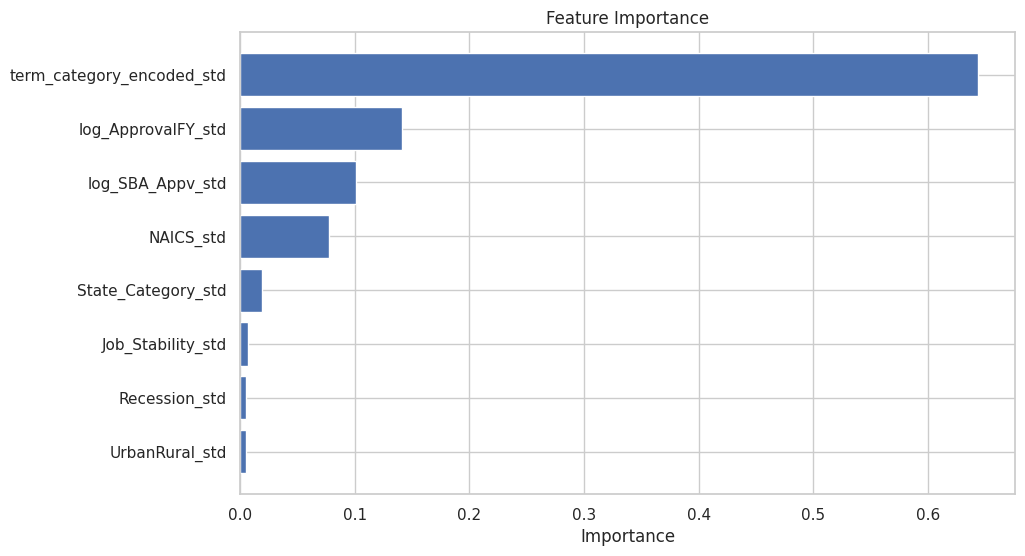

In [ ]:
# Mendapatkan feature importance dari model
feature_importance = best_dt.feature_importances_

# Membuat DataFrame untuk memudahkan plotting
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()